<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/blob/master/homeworks/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and libraries

In [0]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

# 1. Perceptron Mistakes
In this problem, we will investigate perceptron algorithm with different iteration ordering.

Consider applying the perceptron algorithm through the origin based on a small training set containing three points:

x(1)  =[-1,-1],	 y(1) =1  
x(2)  =[1,0],	 y(2) =-1  
x(3)  =[-1, 1.5],	 y(3) =1  
Given that the algorithm starts with  θ(0)=0 , the first point that the algorithm sees is always considered a mistake. The algorithm starts with some data point and then cycles through the data (in order) until it makes no further mistakes.  


(a)  
4 points possible (graded)  
How many mistakes does the algorithm make until convergence if the algorithm starts with data point x(1)? How many mistakes does the algorithm make if it starts with data point x(2)?  

Also provide the progression of the separating plane as the algorithm cycles in the following format: [[θ(1)1,θ(1)2],…,[θ(N)1,θ(N)2]], where the superscript denotes different theta as the separating plane progresses. For example, if θ progress from [0,0] (initialization) to [1,2] to [3,−2], you should enter [[1,2],[3,−2]]  



In [0]:
def perceptron(x, y, w0=0, start=0):
  """
  Decision boundary: wx(i) + w0 = 0
  """

  n = x.shape[0]
  w = np.zeros(2)
  weights = [] # updating progress
  while True:
    converged = True
    for i in chain(range(start, n), range(start)):
      if y[i] * (w.dot(x[i]) + w0) <= 0: # misclassified
        w += y[i]*x[i] # update weight
        weights.append(w.tolist()) # capture intermediate weight
        converged = False
    
    if converged:
      break
  
  return weights

x = np.array([[-1,-1], [1,0], [-1, 1.5]])
y = np.array([1, -1, 1])
print(perceptron(x, y))
print(perceptron(x, y, start=1))

[[-1.0, -1.0], [-2.0, 0.5]]
[[-1.0, 0.0]]


(c)  
4 points possible (graded)  
Now assume that x(3)=[−1,10]. How many mistakes does the algorithm make until convergence if cycling starts with data point x(1)?  

Also provide the progression of the separating plane as the algorithm cycles in the following format: [[θ(1)1,θ(1)2],…,[θ(N)1,θ(N)2]], where the superscript denotes different theta as the separating plane progresses.  


In [0]:
x2 = np.array([[-1,-1], [1,0], [-1, 10]])
y2 = np.array([1, -1, 1])
print(perceptron(x2, y2))
print(perceptron(x2, y2, start=1))

[[-1.0, -1.0], [-2.0, 9.0], [-3.0, 8.0], [-4.0, 7.0], [-5.0, 6.0], [-6.0, 5.0]]
[[-1.0, 0.0]]


(d)  
1 point possible (graded)  
For a fixed iteration order, what are the factors that affect the number of mistakes made by the algorithm between part (a) and part (c)?  

Note: Only choose factors that were changed between part (a) and part (c), not all factors that can affect the number of mistakes  


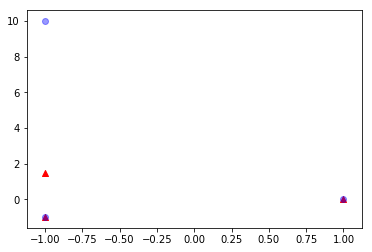

In [0]:
plt.scatter(x[:, 0], x[:, 1], color="r", marker='^')
plt.scatter(x2[:, 0], x2[:, 1], color="b", alpha=.4)

# 2. Perceptron Performance


(a)  
2 points possible (graded)  
The following table shows a data set and the number of times each point is misclassified during a run of the perceptron algorithm (with offset θ0). θ and θ0 are initialized to zero.  

i	x(i)	y(i)	times misclassified  
1	[-4, 2]	+1	1  
2	[-2, 1]	+1	0  
3	[-1, -1]	-1	2  
4	[2, 2]	-1	1  
5	[1, -2]	-1	0  
Write down the state of θ and θ0 after this run has completed (note, the algorithm may not yet have converged). Enter θ as a list [θ1,θ2] and θ0 as a single number in the following boxes.  


In [0]:
def misclassify(x, y, w=None, iters=1000):
  """
  Decision boundary: wx(i) = 0
  w: if None, initialize to 0
  """
  
  n, d = x.shape
  x = np.column_stack((np.ones(n), x)) # add preceding 1's
  if w is None:
    w = np.zeros(d + 1) # add preceding offset
  else:
    w = np.array(w, dtype=float)

  counts = np.zeros(n, dtype=int) # count of mistakes on each point
  mistakes = [] # intermediate mistakes
  weights = [] # intermediate weights
  for k in range(iters):
    converged = True
    for i in range(n):
      if y[i] * w.dot(x[i]) <= 0: # misclassified
        w += y[i]*x[i] # update weight
        counts[i] += 1 # update mistake count
        weights.append(w.tolist()) # capture intermediate weight
        mistakes.append(counts.tolist()) # capture intermediate mistakes
        converged = False
    
    if converged:
      break
  
  return mistakes, weights

x3 = np.array([[-4, 2], [-2, 1], [-1, -1], [2, 2], [1, -2]])
y3 = np.array([1, 1, -1, -1, -1])
mistakes, weights = misclassify(x3, y3)
print(mistakes)
print(weights)

[[1, 0, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 1, 1, 0], [1, 0, 2, 1, 0], [1, 0, 3, 1, 0]]
[[1.0, -4.0, 2.0], [0.0, -3.0, 3.0], [-1.0, -5.0, 1.0], [-2.0, -4.0, 2.0], [-3.0, -3.0, 3.0]]


(b)  
2 points possible (graded)  
Provide one example of a different initialization of θ such that the perceptron algorithm with this initialization would not produce any mistakes during a run through the data.  


In [0]:
mistakes, weights = misclassify(x3, y3, w=(-10, -10, 10))
print(mistakes)
print(weights)

[]
[]
